In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


## Accuracy

> Question: When accuracy is misleading?

**Answer**

Imagine a dataset for detecting fraudulent transactions, where:

99% of transactions are not fraud (label = 0)

1% are fraud (label = 1)

You train a classifier, and it just predicts 0 for every transaction.

___
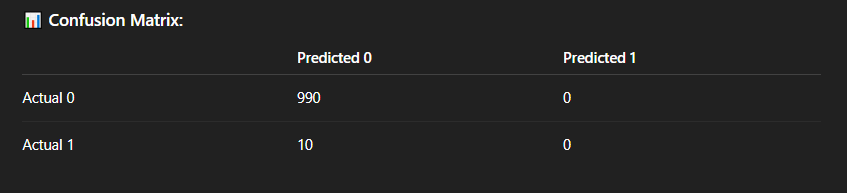
___

Accuracy = (990 correct predictions) / (1000 total) = 99%

Looks great! But the model never catches a fraud case (0% recall for fraud).

___
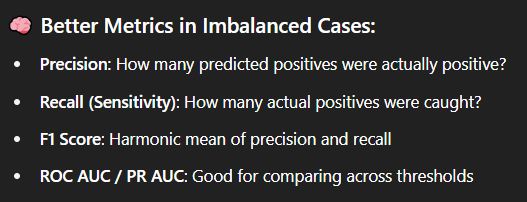
___

In [2]:
data = sns.load_dataset('titanic')

In [3]:
x = data.drop(['survived', 'alive'] , axis=1)
y = data['survived']

In [4]:
x.isnull().sum()

pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [5]:
x['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [6]:
x['age'] = x['age'].fillna(x['age'].mean())
x['deck'] = x['deck'].fillna(x['deck'].mode())
x['embark_town'] = x['embark_town'].fillna(x['embark_town'].mode())

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town']
numeric_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keeps numeric columns
)

x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

In [9]:
x_train

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
452,1,male,30.000000,0,0,27.7500,C,First,man,True,C,Cherbourg,True
827,2,male,1.000000,0,2,37.0042,C,Second,child,False,NaN,Cherbourg,False
528,3,male,39.000000,0,0,7.9250,S,Third,man,True,NaN,Southampton,True
803,3,male,0.420000,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,False
764,3,male,16.000000,0,0,7.7750,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,3,female,29.699118,1,0,14.4542,C,Third,woman,False,NaN,Cherbourg,False
571,1,female,53.000000,2,0,51.4792,S,First,woman,False,C,Southampton,False
858,3,female,24.000000,0,3,19.2583,C,Third,woman,False,NaN,Cherbourg,False
509,3,male,26.000000,0,0,56.4958,S,Third,man,True,NaN,Southampton,True


In [10]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()

In [11]:
lr.fit(x_train_encoded, y_train)
dtc.fit(x_train_encoded, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [12]:
y_pred1 = lr.predict(x_test_encoded)
y_pred2 = dtc.predict(x_test_encoded)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [14]:
print('Logistic Regression:',accuracy_score(y_test, y_pred1) )
print('Decision Tree:',accuracy_score(y_test, y_pred2) )

Logistic Regression: 0.8491620111731844
Decision Tree: 0.7653631284916201


### Confusion Matrix

`For Binary Classification`

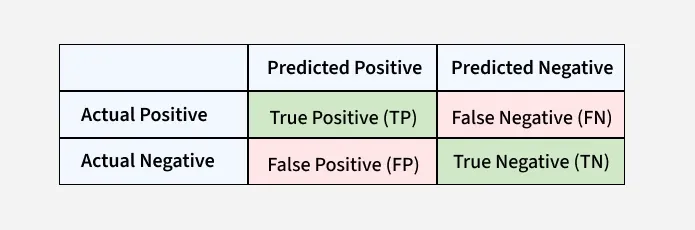
___

`For Multiple Classification`

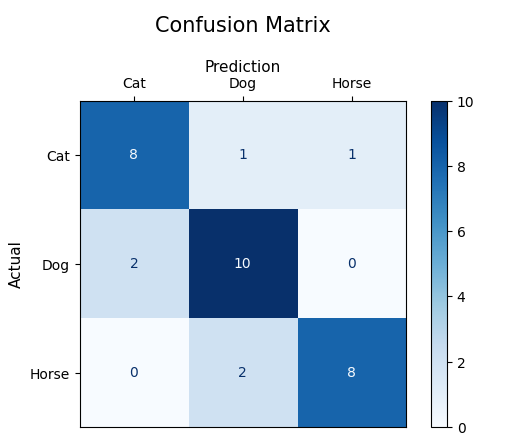

In [15]:
print('Logistic Regression:',confusion_matrix(y_test, y_pred1) )
print('Decision Tree:',confusion_matrix(y_test, y_pred2) )

Logistic Regression: [[102  12]
 [ 15  50]]
Decision Tree: [[89 25]
 [17 48]]


<Axes: >

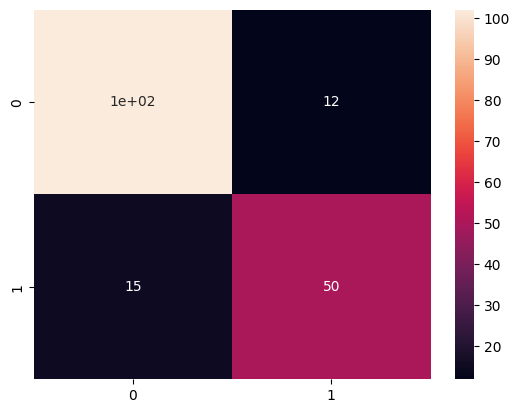

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True)

In [27]:
df = sns.load_dataset('iris')
df.sample()


# setosa = 1
# virginica = 2
# versicolor = 3
def encode(data):
    if(data == 'setosa'):
        return 1
    elif(data == 'virginica'):
        return 2
    else:
        return 3

df['new_species'] = df['species'].apply(encode)

In [57]:
from sklearn.datasets import load_wine
# Load the dataset
wine = load_wine()

# Convert to DataFrame
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [59]:
x = df.drop(['target'], axis=1)
y = df['target']

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()


lr.fit(x_train, y_train)
dtc.fit(x_train, y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [63]:
pred1 = lr.predict(x_test)
pred2 = dtc.predict(x_test)

In [64]:
print('LR: ',accuracy_score(y_test, pred1))
print('LR: ',confusion_matrix(y_test, pred1))
print('DTC: ',accuracy_score(y_test, pred2))
print('DTC: ',confusion_matrix(y_test, pred2))

LR:  0.9722222222222222
LR:  [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
DTC:  0.9444444444444444
DTC:  [[13  1  0]
 [ 0 14  0]
 [ 0  1  7]]


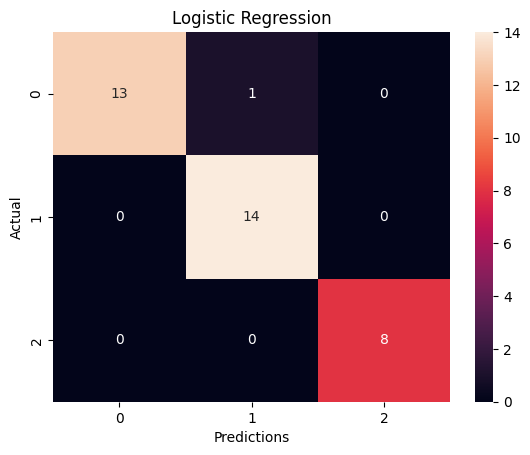

In [69]:
sns.heatmap(confusion_matrix(y_test, pred1), annot=True)
plt.title('Logistic Regression')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()

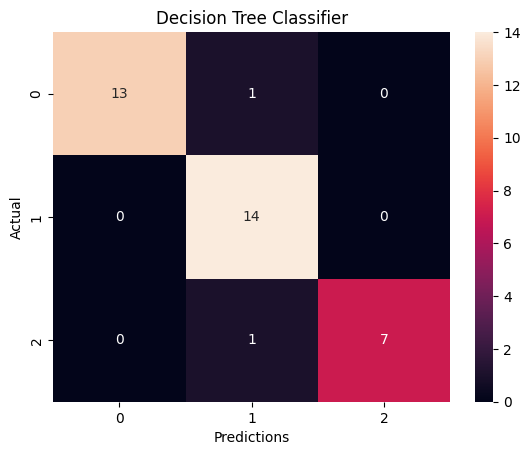

In [70]:
sns.heatmap(confusion_matrix(y_test, pred2), annot=True)
plt.title('Decision Tree Classifier')
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.show()